In [1]:
DF_PATH       = "../data/processed/1_preprocessed_df.pkl"
FEATURES_PATH = "../data/processed/features_skills_clusters.pkl"

ROLE_COLS      = ['DevType']
TECH_COLS      = ['LanguageHaveWorkedWith',
                  'DatabaseHaveWorkedWith',
                  'PlatformHaveWorkedWith',
                  'WebframeHaveWorkedWith',
                  'MiscTechHaveWorkedWith',
                  'ToolsTechHaveWorkedWith',
                  'NEWCollabToolsHaveWorkedWith']

EXPORT_PATH    = "../data/processed/2_cleaned_data.pkl"

In [2]:
import os
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MultiLabelBinarizer


In [3]:
processed_df = pd.read_pickle(DF_PATH)
features_df = pd.read_pickle(FEATURES_PATH)

In [4]:
encoded_dfs = {}
for col in ROLE_COLS + TECH_COLS:
    binarizer = MultiLabelBinarizer()
    encoded_df = pd.DataFrame(binarizer.fit_transform(processed_df[col]),
                               columns=binarizer.classes_,
                               index=processed_df[col].index)
    encoded_dfs[col] = encoded_df

encoded_dfs = pd.concat(encoded_dfs, axis=1)
encoded_dfs

DevType                                           \
      Academic researcher Blockchain Cloud infrastructure engineer   
0                       0          0                             0   
1                       0          0                             0   
2                       0          0                             0   
3                       0          0                             0   
4                       0          0                             0   
...                   ...        ...                           ...   
89179                   0          0                             0   
89180                   0          0                             0   
89181                   0          0                             0   
89182                   0          0                             0   
89183                   0          0                             0   

                                                                              \
      Data or business analyst Data scientist or machine learning specialist   
0                            0                                             0   
1                            0                                             0   
2                            0                                             0   
3                            0                                             0   
4                            0                                             0   
...                        ...                                           ...   
89179                        0                                             0   
89180                        0                                             0   
89181                        0                                             0   
89182                        0                                             0   
89183                        0                                             0   

                                                                            \
      Database administrator Designer DevOps specialist Developer Advocate   
0                          0        0                 0                  0   
1                          0        0                 0                  0   
2                          0        0                 0                  0   
3                          0        0                 0                  0   
4                          0        0                 0                  0   
...                      ...      ...               ...                ...   
89179                      0        0                 0                  0   
89180                      0        0                 0                  0   
89181                      0        0                 0                  0   
89182                      0        0                 0                  0   
89183                      0        0                 0                  0   

                            ... NEWCollabToolsHaveWorkedWith               \
      Developer Experience  ...                       Spyder Sublime Text   
0                        0  ...                            0            0   
1                        0  ...                            0            0   
2                        0  ...                            0            0   
3                        0  ...                            0            0   
4                        0  ...                            0            0   
...                    ...  ...                          ...          ...   
89179                    0  ...                            0            1   
89180                    0  ...                            0            0   
89181                    0  ...                            0            0   
89182                    0  ...                            0            0   
89183                    0  ...                            0            0   

                                                 

In [5]:
processed_df['DevType'].value_counts()

DevType
[Developer, full-stack]                            25735
[Developer, back-end]                              13745
[]                                                 12312
[Developer, front-end]                              5071
[Developer, desktop or enterprise applications]     3904
[Other (please specify):]                           3080
[Developer, mobile]                                 2597
[Engineering manager]                               2033
[Student]                                           1996
[Developer, embedded applications or devices]       1845
[Data scientist or machine learning specialist]     1588
[DevOps specialist]                                 1387
[Academic researcher]                               1354
[Research & Development role]                       1353
[Senior Executive (C-Suite, VP, etc.)]              1332
[Engineer, data]                                    1248
[Cloud infrastructure engineer]                     1036
[Developer, game or gra

### Remove Some Roles

In [6]:
removed_roles = [
    'Other (please specify):',
    'Student',
    'Designer',
    'Educator',
    'Marketing or sales professional',
    'Engineering manager',
    'Senior Executive (C-Suite, VP, etc.)',
    'Product manager',
    'Engineer, site reliability']


for role in removed_roles:
    encoded_dfs = encoded_dfs.drop(('DevType' , role) , axis = 1)
    


In [7]:
original_role_sum = encoded_dfs["DevType"].sum(axis=0)
original_role_sum

Academic researcher                               1354
Blockchain                                         323
Cloud infrastructure engineer                     1036
Data or business analyst                           837
Data scientist or machine learning specialist     1588
Database administrator                             257
DevOps specialist                                 1387
Developer Advocate                                 212
Developer Experience                               326
Developer, QA or test                              586
Developer, back-end                              13745
Developer, desktop or enterprise applications     3904
Developer, embedded applications or devices       1845
Developer, front-end                              5071
Developer, full-stack                            25735
Developer, game or graphics                        866
Developer, mobile                                 2597
Engineer, data                                    1248
Hardware E

D:\End to End Data Science Projects\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\End to End Data Science Projects\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


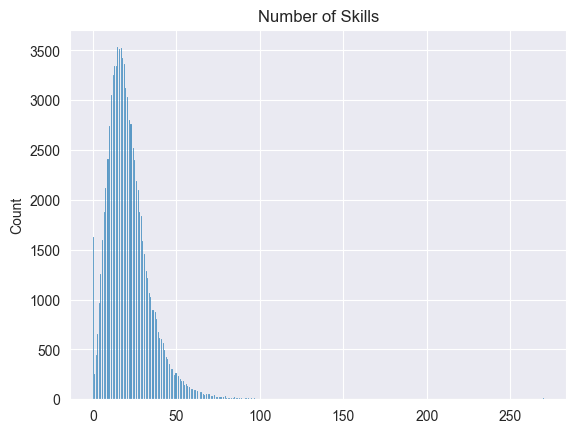

In [18]:
freq_tech = encoded_dfs[TECH_COLS].sum(axis=1)
sns.histplot(freq_tech)
plt.title('Number of Skills')
plt.show()

In [14]:
encoded_dfs[ROLE_COLS].droplevel(0 , axis = 1).sum(axis = 0)

Academic researcher                               1354
Blockchain                                         323
Cloud infrastructure engineer                     1036
Data or business analyst                           837
Data scientist or machine learning specialist     1588
Database administrator                             257
DevOps specialist                                 1387
Developer Advocate                                 212
Developer Experience                               326
Developer, QA or test                              586
Developer, back-end                              13745
Developer, desktop or enterprise applications     3904
Developer, embedded applications or devices       1845
Developer, front-end                              5071
Developer, full-stack                            25735
Developer, game or graphics                        866
Developer, mobile                                 2597
Engineer, data                                    1248
Hardware E

In [16]:
encoded_dfs[TECH_COLS].sum(axis=1)

0         0
1        23
2        14
3        25
4        24
         ..
89179    40
89180    16
89181    16
89182    42
89183    25
Length: 89184, dtype: int64

In [19]:
TECH_RANGE  = [3,50]
filter_mask   = (freq_tech >= TECH_RANGE[0])   & (freq_tech <= TECH_RANGE[1])


In [20]:
features_df = features_df.loc[filter_mask].copy()
encoded_dfs = encoded_dfs.loc[filter_mask].copy()

In [21]:
cleaned_role_sum = encoded_dfs["DevType"].sum(axis=0)
cleaned_role_sum

Academic researcher                               1279
Blockchain                                         299
Cloud infrastructure engineer                      994
Data or business analyst                           795
Data scientist or machine learning specialist     1528
Database administrator                             243
DevOps specialist                                 1319
Developer Advocate                                 200
Developer Experience                               308
Developer, QA or test                              571
Developer, back-end                              13402
Developer, desktop or enterprise applications     3765
Developer, embedded applications or devices       1807
Developer, front-end                              4974
Developer, full-stack                            24630
Developer, game or graphics                        838
Developer, mobile                                 2519
Engineer, data                                    1195
Hardware E

In [22]:
features_df.columns = pd.MultiIndex.from_product([['skills_clusters'], 
                                                  features_df.columns])

In [23]:
features_df

skills_clusters                                                 \
       skills_group_0 skills_group_1 skills_group_10 skills_group_11   
1                   2              2               0               3   
2                   0              5               0               4   
3                   0              2               2               2   
4                   0              1               0               4   
5                   0              3               1               6   
...               ...            ...             ...             ...   
89179               1              0               0               2   
89180               5              0               0               2   
89181               5              4               0               1   
89182               5              4               0               5   
89183               0              0               0               2   

                                                                       \
      skills_group_12 skills_group_13 skills_group_14 skills_group_15   
1                   0               0               0               0   
2                   0               0               0               0   
3                   0               0               0               0   
4                   0               0               0               0   
5                   0               0               0               1   
...               ...             ...             ...             ...   
89179               1               0               0               2   
89180               0               0               0               0   
89181               2               0               0               0   
89182               0               0               0               0   
89183               0               0               0               1   

                                       ...                                  \
      skills_group_16 skills_group_17  ... skills_group_21 skills_group_22   
1                   0               2  ...               0               0   
2                   1               0  ...               0               1   
3                   0               2  ...               0               0   
4                   2               0  ...               0               0   
5                   3               1  ...               0               0   
...               ...             ...  ...             ...             ...   
89179               3               4  ...               0               0   
89180               2               0  ...               0               0   
89181               0               0  ...               0               0   
89182               1               1  ...               0               0   
89183               0               2  ...               0               0   

                                                                    \
      skills_group_23 skills_group_3 skills_group_4 skills_group_5   
1                   0              0              0              0   
2                   0              0              1              0   
3                   0              1              1              1   
4                   0              0              0              0   
5                   0              0              1              0   
...               ...            ...            ...            ...   
89179               0              0              3              8   
89180               0              0              1              5   
89181               0              0              2              0   
89182               0              0              7              3   
89183               0              0             10              0   

                                                                   
      skills_group_6 skills_group_7 skills_group_8 skills_group_9  
1                  0              0              0       

In [24]:
df = pd.concat([encoded_dfs, features_df], axis=1)


In [26]:
df.to_pickle(EXPORT_PATH)
